# Introduction
This project is to analysis the potability of the drinking water based on attribute such as pH, Hardness of impurities, Solid, Presence of Chloramines, Sulfate, Organic carbon, Trihalomethanes also conductivity of water and turbidity of water. This output is based on one (Safe for drinking) and zero ( Not safe for drinking). 

After analysis, we will created a few model to train our machine learning to predict the water is safe or not for drinking

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model for our machine learning 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [3]:

df=pd.read_csv('drinking_water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
print('Dataframe shape :',df.shape)

null=list(df.isna().sum()) # Find na value in every row
types=list(df.dtypes) # Identify the data type of every row
unique = list(df.nunique()) # Find number of unique value in dataset

info=pd.DataFrame({'Data Types': types,'Null': null,'Unique':unique},index=df.columns) # Create new dataframe with the attributes assingned

info

Dataframe shape : (3276, 10)


,Data Types,Null,Unique
ph,float64,491,2785
Hardness,float64,0,3276
Solids,float64,0,3276
Chloramines,float64,0,3276
Sulfate,float64,781,2495
Conductivity,float64,0,3276
Organic_carbon,float64,0,3276
Trihalomethanes,float64,162,3114
Turbidity,float64,0,3276
Potability,int64,0,2


In [5]:
df_1=df.copy() # Copy the dataframe to safe time loading

# Clean the dataset and validate the value of the data

In [6]:
df_1.interpolate(method='pad',axis=0,inplace=True) # I use the interpolate method to fill up the null values, can visit the documentation for details

In [24]:
# df_1.isna().sum()
df_1.dropna(inplace=True)

In [25]:
df_1.info

<bound method DataFrame.info of             ph    Hardness       Solids  Chloramines     Sulfate  \
1     3.716080  129.422921  18630.05786     6.635246  368.516441   
2     8.099124  224.236259  19909.54173     9.275884  368.516441   
3     8.316766  214.373394  22018.41744     8.059332  356.886136   
4     9.092223  181.101509  17978.98634     6.546600  310.135738   
5     5.584087  188.313324  28748.68774     7.544869  326.678363   
...        ...         ...          ...          ...         ...   
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362  359.948574   
3273  9.419510  175.762646  33155.57822     7.350233  359.948574   
3274  5.126763  230.603758  11983.86938     6.303357  359.948574   
3275  7.874671  195.102299  17404.17706     7.509306  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1       592.885359       15.180013        56.329076   4.500656           0

In [9]:
df_1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,7.070595,196.366894,22014.465892,7.122222,333.935676,426.162942,14.286163,66.416400,3.967093,0.390229
std,1.592080,32.884445,8769.883803,1.583324,41.263707,80.800355,3.307963,16.203474,0.780304,0.487876
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.087664,176.847379,15665.106980,6.127037,307.652451,365.729707,12.066072,55.899843,3.440020,0.000000
50%,7.031684,196.952875,20933.512750,7.130161,333.073546,421.879854,14.219303,66.661479,3.955091,0.000000
75%,8.061338,216.669594,27334.162290,8.115043,360.120507,481.754747,16.558126,77.366173,4.500432,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [10]:
df_1.groupby(by='Potability').mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.080101,196.729207,21777.984615,7.092070,334.643070,426.661561,14.366331,66.254811,3.966302
1,7.055741,195.800744,22383.991018,7.169338,332.830302,425.383800,14.160893,66.668898,3.968328


# Find the distribution of the data using histogram

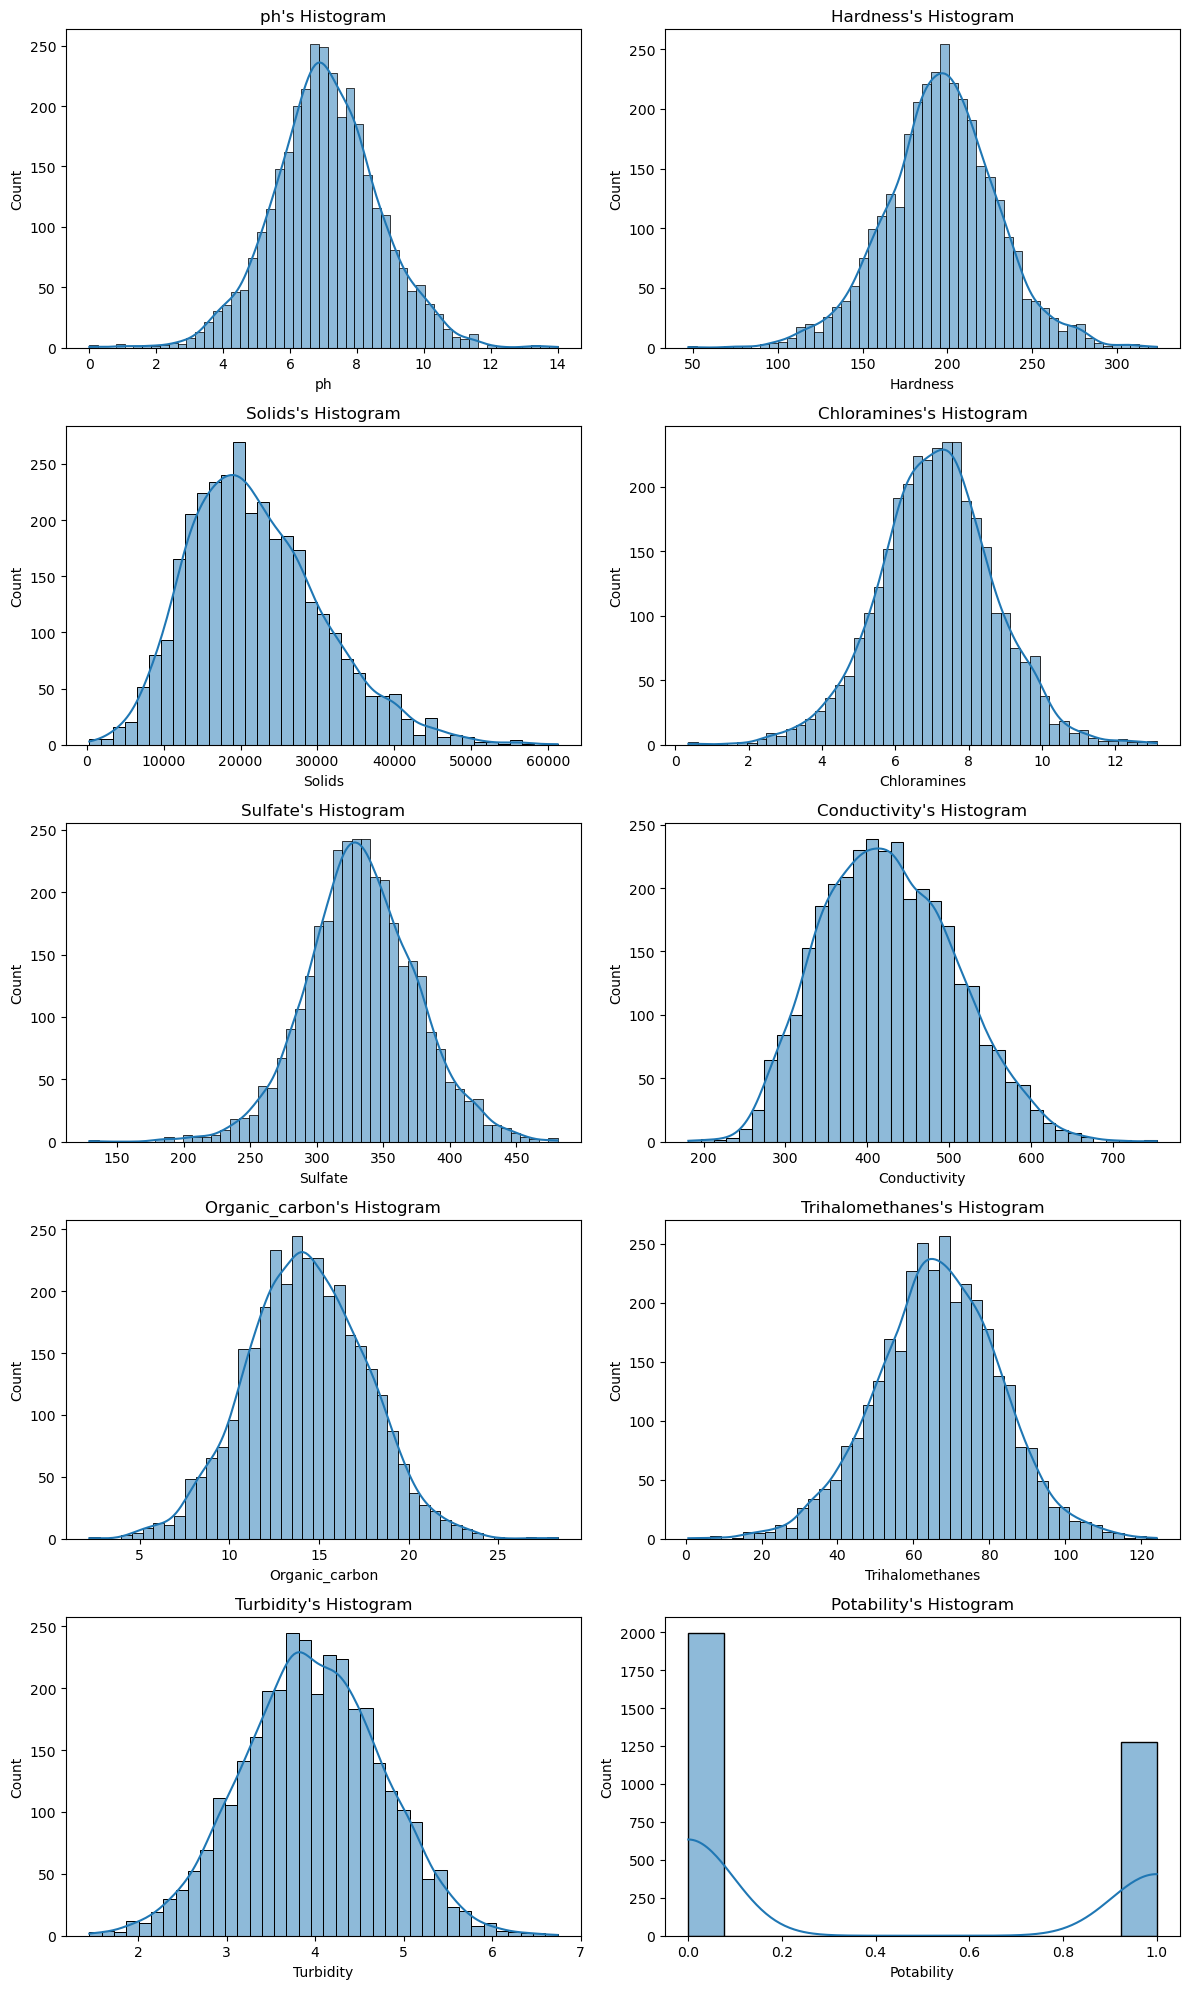

In [12]:
# Distribution of values for each feature ( to make sure the data is normally distributed in the rows)

plt.figure(figsize=(12,20))

for n, column in enumerate(df_1.columns):
    plt.subplot(5, 2, n+1)
    sns.histplot(df_1[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"{column}'s Histogram")

plt.tight_layout()
plt.show()


All the features seem to be falling into a normal distribution, with the exception of few that are shifted a little to the sides. This information can be used later on when choosing the model.

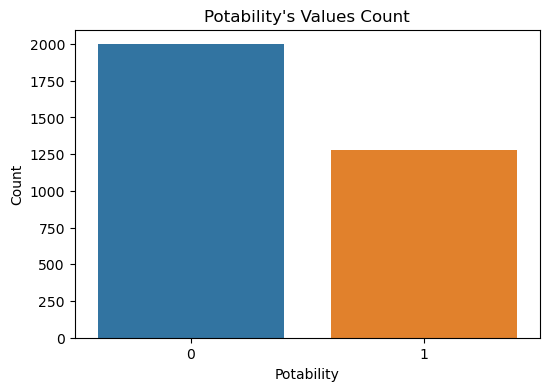

In [13]:
# Checking the value count of potability

plt.figure(figsize=(6,4))
sns.barplot(x=list(df_1['Potability'].unique()), y=df_1['Potability'].value_counts())
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title("Potability's Values Count")

plt.show()

In [14]:
# Establish dependent and independent data

X= df_1.drop(columns='Potability') # Input data
y = df_1['Potability'] # Output data

#Scaling the data

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Split data between training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=42)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (1965, 9)
X_test shape: (1310, 9)


# Creating Model

In [15]:
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)

LR=LogisticRegression()
LR.fit(X_train,y_train)

RF= RandomForestClassifier()
RF.fit(X_train,y_train)

GNB= GaussianNB()
GNB.fit(X_train,y_train)

models=[KNN,LR,RF,GNB]

train_acc=[]
test_acc=[]
train_logloss=[]
test_logloss=[]
train_rocauc=[]
test_rocauc=[]

for model in models:
    y_train_hat=model.predict(X_train)
    y_test_hat=model.predict(X_test)
    train_acc.append(round(accuracy_score(y_train,y_train_hat)*100,2))
    test_acc.append(round(accuracy_score(y_test,y_test_hat)*100,2))
    train_logloss.append((log_loss(y_train,y_train_hat)))
    test_logloss.append((log_loss(y_test,y_test_hat)))
    train_rocauc.append(round(roc_auc_score(y_train,y_train_hat),2))
    test_rocauc.append(round(roc_auc_score(y_test,y_test_hat),2))
    
metrics=pd.DataFrame({'Train Accuracy %':train_acc,'Test Accuracy %': test_acc,'Train Log Loss ': train_logloss,'Test Log Loss ': test_logloss,'Train ROC AUC':train_rocauc,'Test ROC AUC': test_rocauc},index=['K-Nearest Neighbor','Logistic Regression','Random Forest','Gaussian Naive Bayes'])

metrics

,Train Accuracy %,Test Accuracy %,Train Log Loss,Test Log Loss,Train ROC AUC,Test ROC AUC
K-Nearest Neighbor,75.17,62.29,8.577634e+00,13.024653,0.72,0.57
Logistic Regression,60.41,62.29,1.367489e+01,13.024546,0.50,0.50
Random Forest,100.00,67.40,9.992007e-16,11.258139,1.00,0.62
Gaussian Naive Bayes,63.77,62.52,1.251487e+01,12.945516,0.57,0.55


Data frame displays, the Random Forest Classifier score higher accuracy in its predictions, while keeping lowest Logarithmic Loss score and the best proportion of the Area Under the Receiver Operating Characteristic Curve.

Although the model got great results predicting the training data,the test data predictions came out with significantly worse performance, indicating overfitting. To solve this I'll implement Scikit-Learn’s RandomizedSearchCV method with K-Fold. This method will help pinpoint the best hyperparameters for our model while trying to solve our overfitting problem.

# Tuning Hyperparameter in Random Forest Model to avoid overfitting

* n_estimastors = The number of trees in the forest
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [16]:
n_estimators = list(range(200, 2000, 200))
max_depth = list(range(10, 110, 10))
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
n_iter = 100


param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Instantiate RandomSearchCV
model_random = RandomizedSearchCV(
estimator=RF,
param_distributions=param_grid,
n_iter=n_iter,cv = 3, verbose=0, random_state=1984, n_jobs = -1)


In [17]:
# model_random.fit(X_train,y_train)

# Find the best parameter for our models

In [18]:
# print(model_random.best_params_) # Need to comment out to saving CPU processing/ Can uncomment to find out best parameter for our model

In [19]:
RF = RandomForestClassifier(n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_depth=80, bootstrap=True)
RF.fit(X_train, y_train)

y_train_hat = RF.predict(X_train)
y_test_hat = RF.predict(X_test)

train_acc.append(round(accuracy_score(y_train, y_train_hat)*100, 2))
test_acc.append(round(accuracy_score(y_test, y_test_hat)*100, 2))
train_logloss.append(log_loss(y_train, y_train_hat))
test_logloss.append(log_loss(y_test, y_test_hat))
train_rocauc.append(round(roc_auc_score(y_train, y_train_hat), 2))
test_rocauc.append(round(roc_auc_score(y_test, y_test_hat), 2))

metric=pd.DataFrame({'Train Accuracy %':train_acc,'Test Accuracy %': test_acc,'Train Log Loss ': train_logloss,'Test Log Loss ': test_logloss,'Train ROC AUC':train_rocauc,'Test ROC AUC': test_rocauc},index=['K-Nearest Neighbor','Logistic Regression','Random Forest','Gaussian Naive Bayes','Random Forest (Tuned)'])
metric

,Train Accuracy %,Test Accuracy %,Train Log Loss,Test Log Loss,Train ROC AUC,Test ROC AUC
K-Nearest Neighbor,75.17,62.29,8.577634e+00,13.024653,0.72,0.57
Logistic Regression,60.41,62.29,1.367489e+01,13.024546,0.50,0.50
Random Forest,100.00,67.40,9.992007e-16,11.258139,1.00,0.62
Gaussian Naive Bayes,63.77,62.52,1.251487e+01,12.945516,0.57,0.55
Random Forest (Tuned),97.40,67.63,8.964283e-01,11.179029,0.97,0.62


Although we have make hyperparameter for our random forest model but still cannot improve our overfitting problems. Because I still new in this field, I need to figure out more to find out the method after this. However this analysis can make us learn what if happen if we are overfitting our data for machine learning process.

# Save model in joblib file

In [20]:
import joblib
import pickle

# filename='All_model.joblib'
# joblib.dump([models,RF],filename)

# Load model from joblib

In [21]:
joblib.load('All_model.joblib')

[[KNeighborsClassifier(),
  LogisticRegression(),
  RandomForestClassifier(),
  GaussianNB()],
 RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=5,
                        n_estimators=1200)]